In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

import pugna.data
import pugna.layers
import pugna.activations

mpl.rcParams.update({"font.size": 16})

In [20]:
def gen_data():
    x = np.linspace(-1,1,100)
    y = np.sin(x/0.5) + np.random.normal(0, 0.1, size=x.shape)
    
    return x[:,np.newaxis], y[:,np.newaxis]

In [21]:
x, y = gen_data()

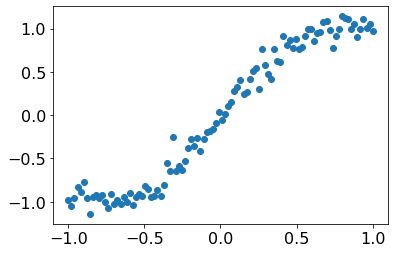

In [22]:
plt.figure()
plt.scatter(x, y)

In [23]:
x.shape

(100, 1)

In [24]:
y.shape

(100, 1)

In [26]:
units = 1000
nscales = 10
lr = 0.001

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(1,)))
model.add(pugna.layers.Mscale(units, nscales))
model.add(tf.keras.layers.Activation(pugna.activations.s2relu))
model.add(pugna.layers.Mscale(units, nscales))
model.add(tf.keras.layers.Activation(pugna.activations.s2relu))
model.add(tf.keras.layers.Dense(1, activation="linear"))

optimizer = tf.keras.optimizers.Adam(lr, amsgrad=True)
model.compile(loss="mse", optimizer=optimizer)

In [29]:
batch_size = x.shape[0]
epochs = 100

In [31]:
%%time
history = model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=False)

CPU times: user 2.97 s, sys: 824 ms, total: 3.79 s
Wall time: 1.06 s


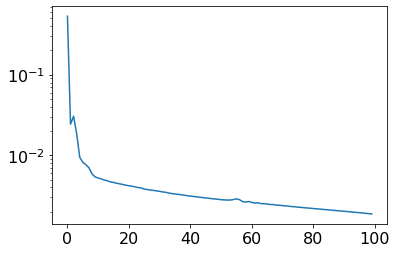

In [32]:
loss = history.history["loss"]
plt.figure()
plt.plot(range(len(loss)), loss)
plt.yscale("log")
plt.show()

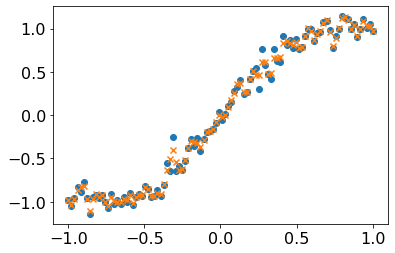

In [33]:
plt.figure()
plt.scatter(x, y)
plt.scatter(x, model.predict(x), marker='x')
plt.show()

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mscale_1 (Mscale)            (None, 1000)              2000      
_________________________________________________________________
activation (Activation)      (None, 1000)              0         
_________________________________________________________________
mscale_3 (Mscale)            (None, 1000)              1001000   
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1001      
Total params: 1,004,001
Trainable params: 1,004,001
Non-trainable params: 0
_________________________________________________________________


# save model example

In [35]:
import pugna.model_utils

## json

In [36]:
pugna.model_utils.save_model_json(model, "test_mscale_model")

In [40]:
new_model = pugna.model_utils.load_model_json("test_mscale_model",
                                custom_objects={'Mscale': pugna.layers.Mscale, 
                                               's2relu':pugna.activations.s2relu})

In [41]:
print(new_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mscale_6 (Mscale)            (None, 1000)              2000      
_________________________________________________________________
activation (Activation)      (None, 1000)              0         
_________________________________________________________________
mscale_7 (Mscale)            (None, 1000)              1001000   
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1001      
Total params: 1,004,001
Trainable params: 1,004,001
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model.predict(x)-new_model.predict(x)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

## hdf5

In [44]:
pugna.model_utils.save_model_h5(model, "test_mscale_model")

In [45]:
new_model = pugna.model_utils.load_model_h5("test_mscale_model.h5",
                                custom_objects={'Mscale': pugna.layers.Mscale, 
                                               's2relu':pugna.activations.s2relu})

In [46]:
print(new_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mscale_8 (Mscale)            (None, 1000)              2000      
_________________________________________________________________
activation (Activation)      (None, 1000)              0         
_________________________________________________________________
mscale_9 (Mscale)            (None, 1000)              1001000   
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1001      
Total params: 1,004,001
Trainable params: 1,004,001
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
model.predict(x)-new_model.predict(x)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],